In [1]:
import numpy as np
import matplotlib.pyplot as plt
from binom import binomial_pmf


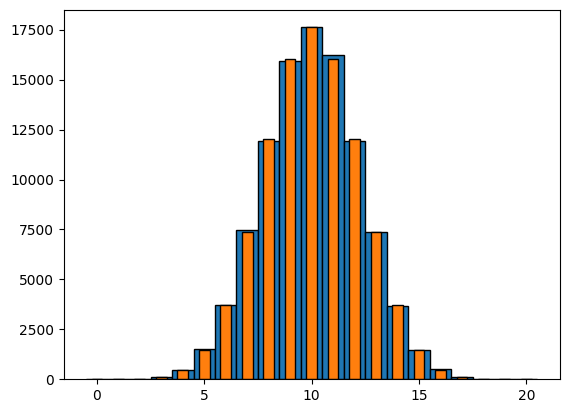

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def coin_tosser_fair(N, reals):
    x = np.arange(N+1,dtype = int)
    y = np.zeros(N+1, dtype=int)
    head_list = np.zeros(reals, dtype=int)
    for j in range(reals):
        coin_flips = np.random.choice([0, 1], size=N)
        heads = np.sum(coin_flips)
        y[heads] += 1
    return x,y
N = 20
reals = 100000
x, y = coin_tosser_fair(N, reals)
i, j = binomial_pmf(20, 0.5)
plt.bar(x, y, edgecolor='k', width=1)
plt.bar(i,j*reals, edgecolor = 'k', width = 0.5)
plt.show()

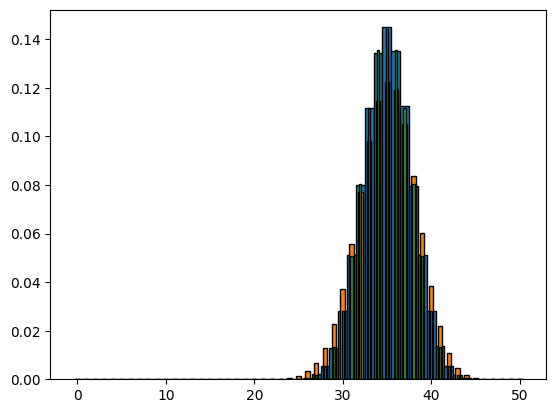

In [25]:
def unfair_coin_tosser(N, b, n, p=0.5):
    fair_coin_n = n - b  # Adjusting fair coin count
    x = np.arange(n+1, dtype=int)
    y = np.zeros(n+1, dtype=int)
    for _ in range(N):
        coin_flips = np.random.choice([0, 1], size=fair_coin_n, p=[1-p, p])
        heads = np.sum(coin_flips) + b  # Add biased coin heads
        y[heads] += 1
    return x, y
import scipy.stats as stats
def biased_coin_pmf(n, b, p):
    """Returns the probability mass function for biased coin tosses."""
    k = np.arange(b, n+1)  # Possible outcomes (at least b heads)
    pmf = stats.binom.pmf(k-b, n-b, p)  # Shifted binomial distribution
    return k, pmf

N = 100000
n = 50
b = 20
x, y = unfair_coin_tosser(N, b, n)
i, j = binomial_pmf(n, (b + ((n-b)*0.5))/n)
m, n = biased_coin_pmf(n, b, 0.5)
plt.bar(x, y/N, edgecolor='k', width=1)
plt.bar(i,j, edgecolor = 'k', width = 0.5)
plt.bar(m,n, edgecolor = 'k', width = 0.25)
plt.show()
